In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80

import sys
sys.path.insert(0, '..')

import os
from pathlib import Path

from hypers import weight_hypers
from hypers import alpha_hypers 

from experiment import load_experiments

from experiment import experiments_to_df

from analysis import extract_needed

In [26]:
experiments_10, df_10 = load_experiments('../results/experim_10.json')

experiments_14, df_14 = load_experiments('../results/experim_14.json')

experiments_21, df_21 = load_experiments('../results/experim_21.json')
experiments_22, df_22 = load_experiments('../results/experim_22.json')

experiments_26, df_26 = load_experiments('../results/experim_26.json')
experiments_27, df_27 = load_experiments('../results/experim_27.json')

experiments_34, df_34 = load_experiments('../results/experim_34.json')
experiments_35, df_35 = load_experiments('../results/experim_35.json')

experiments_41, df_41 = load_experiments('../results/experim_41.json')

experiments_44, df_44 = load_experiments('../results/experim_44.json')
experiments_45, df_45 = load_experiments('../results/experim_45.json')
experiments_46, df_46 = load_experiments('../results/experim_46.json')


In [27]:
noise_experiments = experiments_10 + experiments_14 + experiments_21 + experiments_22 + experiments_26 + \
experiments_27 + experiments_41 + experiments_34 + experiments_35 + experiments_44 + experiments_45 + experiments_46

In [57]:
experiments_46[0].noise_var

8

In [136]:
needed_1 = {
    'random_seed': [103],
    'train_window': [10],
    'key_a': ["default"],
    'noise_var': [0.1, 2, 5, 6, 7, 8, 10, 12],
    'mixing_type': 'decaying past',
    'key_w': ["simple_101"]
}

vital = extract_needed(noise_experiments, needed_1)
vital.sort(key=lambda exp: exp.noise_var)
anls = [experiment.logs for experiment in vital]

In [137]:
# experiments_to_df(vital)

In [138]:
def draw_several(from_start=True, logs=None, labels=None, colors=None,
                 best_color="black", best_label="Best partition",
                 title=None, fig_size=(10, 5), loc='upper left', bbox_to_anchor=None, save_path=None):
    if title is None:
        title = "Master total losses for different algorithms"
    shift = 0 if from_start else logs[0].shift

    plt.figure(figsize=fig_size)

    grid = np.arange(logs[0].total_time - shift)

    plt.plot(grid, logs[0].ideal_losses[shift:].cumsum(), label=best_label, color=best_color, linestyle=(8, (15, 3)))

    for log, label, color in zip(logs, labels, colors):
        plt.plot(grid, log.master_losses_all[shift:].cumsum(), label=label, color=color)

    plt.xlabel("Time")
    plt.ylabel("Cumulative loss")

    plt.legend(loc=loc, bbox_to_anchor=bbox_to_anchor)

    bottom, top = plt.gca().get_ybound()
    left, right = plt.gca().get_xbound()
    for gen_idx, gen_stamp in zip(np.r_[logs[0].indexes, -1], logs[0].stamps):
        if gen_stamp < shift:
            continue
        plt.axvline(gen_stamp - shift, color='grey', linestyle=':', lw=1)
        if gen_idx != -1:
            plt.text(x=gen_stamp - shift + 0.005 * (right - left), y=top - 0.06 * (top - bottom),
                              s=f"{gen_idx+1}", color='grey', rotation=15)

    plt.title(title, fontsize=15)
    if save_path is not None:
        plt.savefig(save_path)
    plt.show()


def extract_needed(experiments, needed):
    vital = []
    for experiment in experiments:
        take = True
        for key in needed.keys():
            if getattr(experiment, key) not in needed[key]:
                take = False
        if take:
            vital.append(experiment)
    return vital


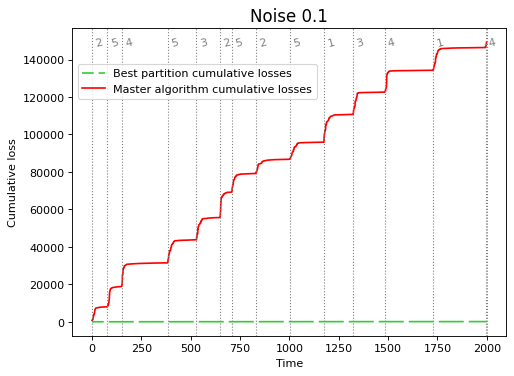

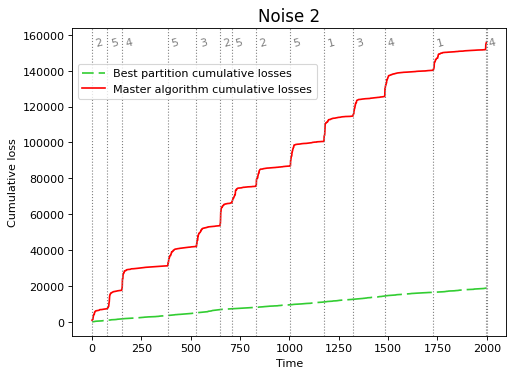

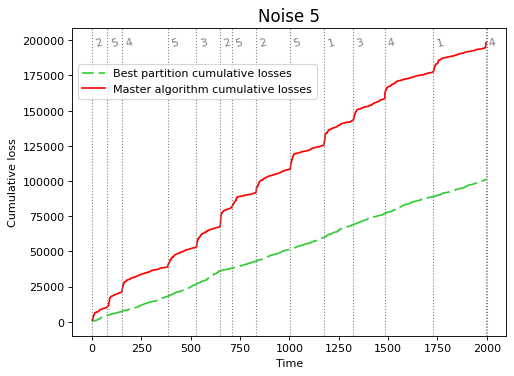

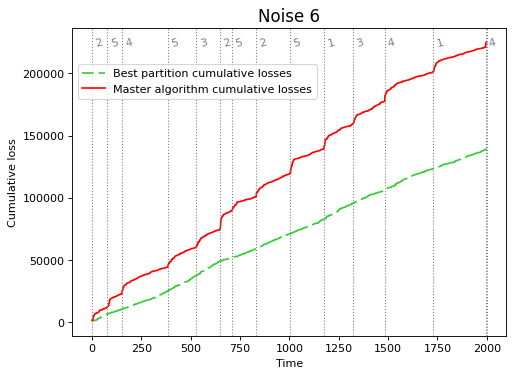

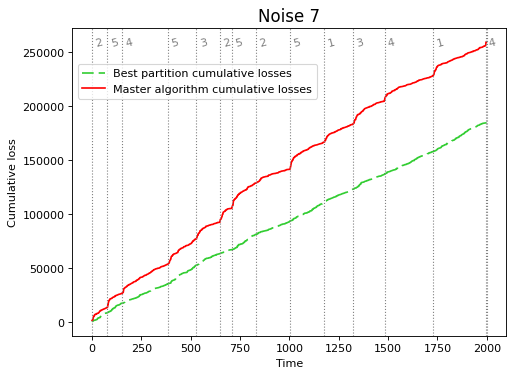

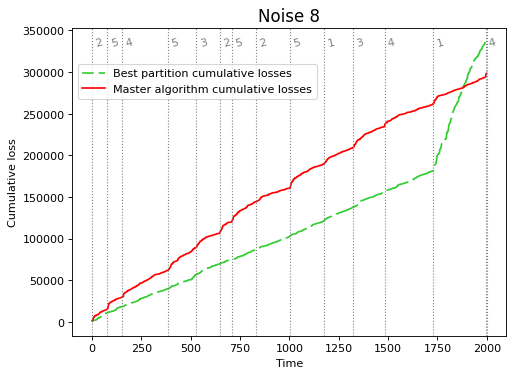

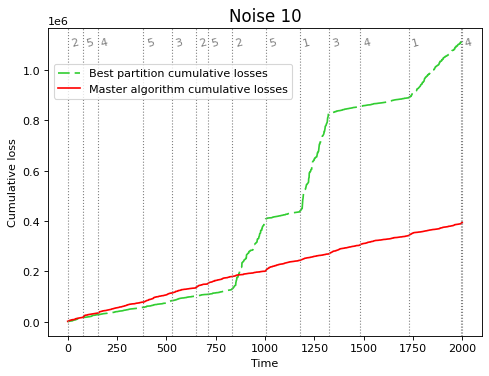

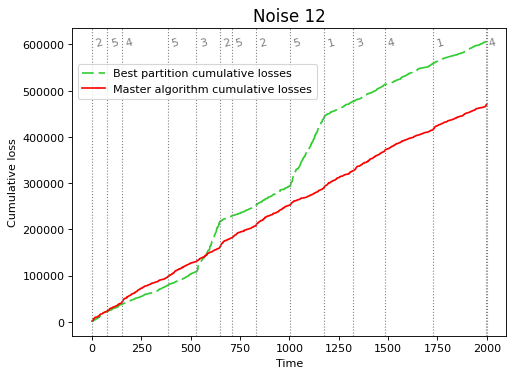

In [142]:
for experiment in vital:
    draw_several(from_start=False, logs=[experiment.logs], labels= ["Master algorithm cumulative losses"], colors=["red"], 
                 best_color="limegreen", best_label="Best partition cumulative losses",
                 title=f"Noise {experiment.noise_var}", fig_size=(7, 5), 
                 loc='upper left', bbox_to_anchor=(0, 0.9))#, save_path=f"../../figures/dec_noise_{experiment.noise_var}.eps")
    
    # save_path=f"noise_{experiment.noise_var}.eps")